<h1>Aim: Analysis of Diabetic patients</h1>

<h2>Imports</h2>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

Loading data set

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/health_data.csv')

<h1>Exploratory Data Analysis</h1>

In [ ]:
data

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,1.0,1.0,0.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,0.0


<H2>Finding Dimentions of data frame</H2>

In [ ]:
data.shape

(70692, 18)

In [ ]:
data.ndim

2

<h2>Identifying the type of data</h2>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Diabetes           

<h2>Removing irrevalent features</h2>

In [ ]:
data.drop(columns=['Age', 'Sex'],inplace=True)
print(data.shape)
data.head()

(70692, 16)


,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


<h2>Finding the duplicate data</h2>

In [ ]:
data.drop_duplicates(inplace=True)
data.count()

HighChol                48692
CholCheck               48692
BMI                     48692
Smoker                  48692
HeartDiseaseorAttack    48692
PhysActivity            48692
Fruits                  48692
Veggies                 48692
HvyAlcoholConsump       48692
GenHlth                 48692
MentHlth                48692
PhysHlth                48692
DiffWalk                48692
Diabetes                48692
Hypertension            48692
Stroke                  48692
dtype: int64

<h2>Finding missing or null values</h2>

In [ ]:
data.isnull().sum()

HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Diabetes                0
Hypertension            0
Stroke                  0
dtype: int64

In [ ]:
data.dtypes

HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Diabetes                float64
Hypertension            float64
Stroke                  float64
dtype: object

<h2>Finding outliers</h2>

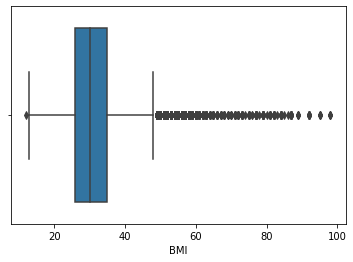

In [ ]:
sns.boxplot(x=data['BMI'])

<h2>Using IQR to remove outliers </h2>

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

HighChol                 1.0
CholCheck                0.0
BMI                      9.0
Smoker                   1.0
HeartDiseaseorAttack     0.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        0.0
GenHlth                  2.0
MentHlth                 5.0
PhysHlth                14.0
DiffWalk                 1.0
Diabetes                 1.0
Hypertension             1.0
Stroke                   0.0
dtype: float64


In [ ]:
print(data.shape)
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape  

(48692, 16)


(27191, 16)

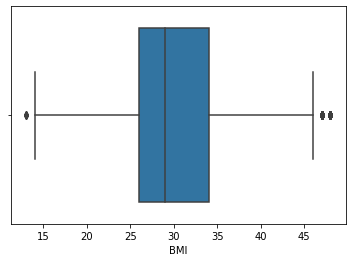

In [ ]:
sns.boxplot(x=data['BMI'])

We have only 3 outliers left

<h1>Graphical EDA: plotting features against one another<br></h1>


In [ ]:
Diabetes = data[data['Diabetes']==1] 

<h2>Bar graph of BMI<br></h2>

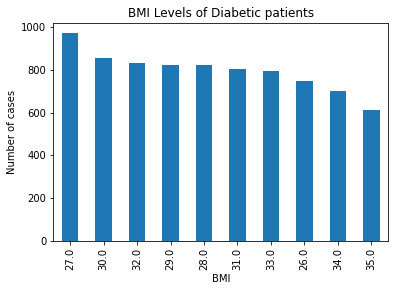

In [ ]:
Diabetes['BMI'].value_counts().nlargest(10).plot(kind='bar')
plt.xlabel('BMI')
plt.ylabel('Number of cases')
plt.title('BMI Levels of Diabetic patients')
plt.show()

<H2>Pie chart of mental health of patients.</H2>

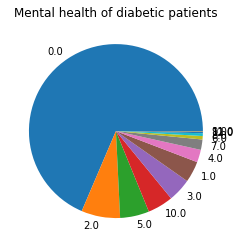

In [ ]:
country = dict(Diabetes['MentHlth'].value_counts())
plt.pie(country.values(),labels=country.keys())
plt.title('Mental health of diabetic patients')
plt.show()

<h2>Bar graph for making comparision among smokers and non smokers.</h2>

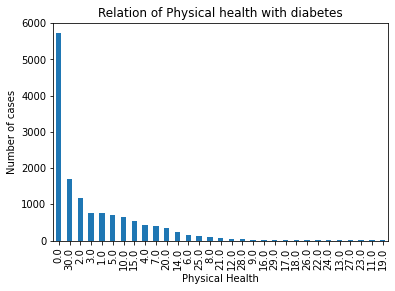

In [ ]:
Diabetes['PhysHlth'].value_counts().plot(kind='bar')
plt.title('Relation of Physical health with diabetes')
plt.xlabel('Physical Health')
plt.ylabel('Number of cases')
plt.show()

<h2>Pie chart for making comparision of Cholestrol</h2>

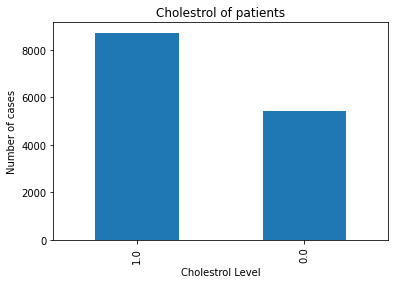

In [ ]:
Diabetes['HighChol'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Cholestrol of patients')
plt.xlabel('Cholestrol Level')
plt.ylabel('Number of cases')
plt.show()

<h2>Pie chart for making comparision among Occupational hazard levels</h2>

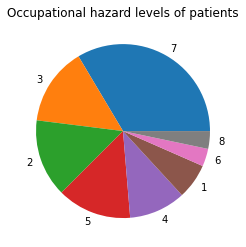

In [ ]:
genre = dict(data['OccuPational Hazards'].value_counts())
plt.pie(genre.values(),labels=genre.keys())
plt.title('Occupational hazard levels of patients')
plt.show()

<h2>Finding Correlation between fields</h2>

,HighChol,BMI,Smoker,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
HighChol,1.000000,0.088273,0.037365,-0.036692,-0.020988,-0.021870,0.126857,0.020117,0.071900,0.090003,0.199454,0.215189,NaN
BMI,0.088273,1.000000,-0.017876,-0.107229,-0.052540,-0.018727,0.177776,-0.006507,0.046713,0.166522,0.250316,0.208141,NaN
Smoker,0.037365,-0.017876,1.000000,-0.040310,-0.038358,-0.002737,0.075042,-0.012821,0.069684,0.072219,0.033745,0.027116,NaN
PhysActivity,-0.036692,-0.107229,-0.040310,1.000000,0.092080,0.094918,-0.160962,0.039100,-0.109806,-0.180912,-0.096708,-0.085354,NaN
Fruits,-0.020988,-0.052540,-0.038358,0.092080,1.000000,0.198944,-0.028078,-0.002330,0.024041,0.006863,-0.020473,-0.006689,NaN
Veggies,-0.021870,-0.018727,-0.002737,0.094918,0.198944,1.000000,-0.033971,0.044592,0.024357,0.000312,-0.045115,-0.030671,NaN
GenHlth,0.126857,0.177776,0.075042,-0.160962,-0.028078,-0.033971,1.000000,0.068802,0.411230,0.343752,0.299107,0.206369,NaN
MentHlth,0.020117,-0.006507,-0.012821,0.039100,-0.002330,0.044592,0.068802,1.000000,0.054541,0.015851,-0.041955,-0.032720,NaN
PhysHlth,0.071900,0.046713,0.069684,-0.109806,0.024041,0.024357,0.411230,0.054541,1.000000,0.325246,0.122857,0.097446,NaN
DiffWalk,0.090003,0.166522,0.072219,-0.180912,0.006863,0.000312,0.343752,0.015851,0.325246,1.000000,0.195105,0.171767,NaN


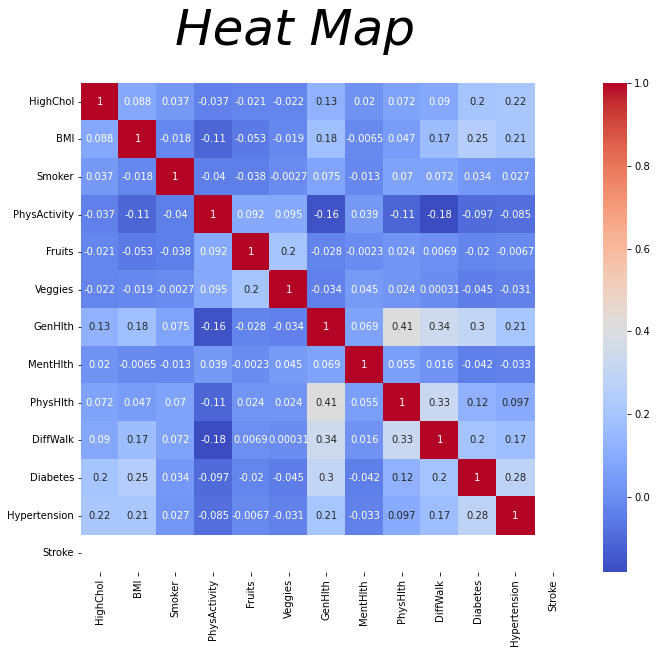

In [ ]:
plt.figure(figsize=(11,9))
c= data.corr(method='pearson')
sns.heatmap(c,cmap='coolwarm',annot=True)

plt.text(2.5,-1, "Heat Map", fontsize = 50, color='Black', fontstyle='italic')
c

In [ ]:
data.drop(columns=['CholCheck', 'HeartDiseaseorAttack','HvyAlcoholConsump'],inplace=True)
print(data.shape)
data.head()

(27191, 13)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,HighChol,BMI,Smoker,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,0.0,26.0,0.0,1.0,0.0,1.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
2,0.0,26.0,0.0,1.0,1.0,1.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,1.0,28.0,1.0,1.0,1.0,1.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,0.0,29.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,18.0,0.0,1.0,1.0,1.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0


,HighChol,BMI,Smoker,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
HighChol,1.000000,0.088273,0.037365,-0.036692,-0.020988,-0.021870,0.126857,0.020117,0.071900,0.090003,0.199454,0.215189,NaN
BMI,0.088273,1.000000,-0.017876,-0.107229,-0.052540,-0.018727,0.177776,-0.006507,0.046713,0.166522,0.250316,0.208141,NaN
Smoker,0.037365,-0.017876,1.000000,-0.040310,-0.038358,-0.002737,0.075042,-0.012821,0.069684,0.072219,0.033745,0.027116,NaN
PhysActivity,-0.036692,-0.107229,-0.040310,1.000000,0.092080,0.094918,-0.160962,0.039100,-0.109806,-0.180912,-0.096708,-0.085354,NaN
Fruits,-0.020988,-0.052540,-0.038358,0.092080,1.000000,0.198944,-0.028078,-0.002330,0.024041,0.006863,-0.020473,-0.006689,NaN
Veggies,-0.021870,-0.018727,-0.002737,0.094918,0.198944,1.000000,-0.033971,0.044592,0.024357,0.000312,-0.045115,-0.030671,NaN
GenHlth,0.126857,0.177776,0.075042,-0.160962,-0.028078,-0.033971,1.000000,0.068802,0.411230,0.343752,0.299107,0.206369,NaN
MentHlth,0.020117,-0.006507,-0.012821,0.039100,-0.002330,0.044592,0.068802,1.000000,0.054541,0.015851,-0.041955,-0.032720,NaN
PhysHlth,0.071900,0.046713,0.069684,-0.109806,0.024041,0.024357,0.411230,0.054541,1.000000,0.325246,0.122857,0.097446,NaN
DiffWalk,0.090003,0.166522,0.072219,-0.180912,0.006863,0.000312,0.343752,0.015851,0.325246,1.000000,0.195105,0.171767,NaN


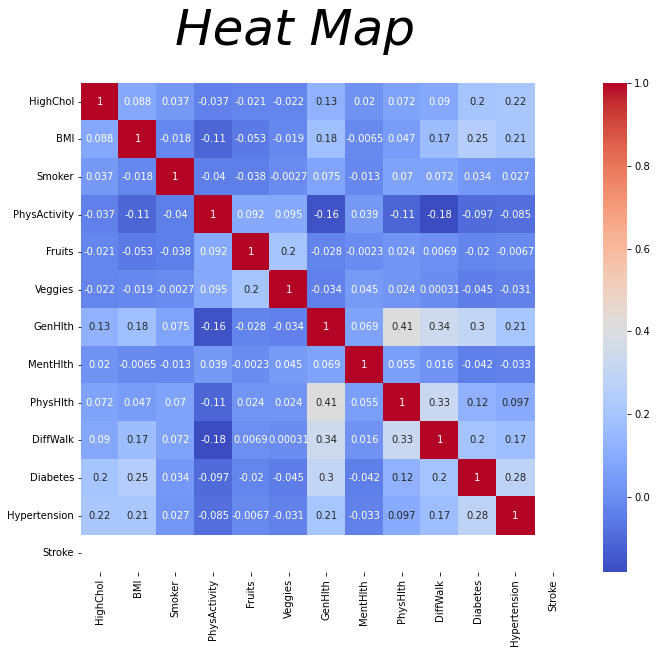

In [ ]:
plt.figure(figsize=(11,9))
c= data.corr(method='pearson')
sns.heatmap(c,cmap='coolwarm',annot=True)

plt.text(2.5,-1, "Heat Map", fontsize = 50, color='Black', fontstyle='italic')
c

<h3> Findings </h3>
1. There is there is correlation between General health and Diabetes: +30%<br>
Thus we can conclude what Healthy people are less prone to diabetes.<br>
2. There is there is high correlation between General health and physical health: +41%<br>
We can conclude that Physically healthy person is more healthy and thus will have less chance of diabetes.<br>
3. There is there is correlation between Difficulty in walking and Physical health: +33%<br>
We can conclude that physical health depends on the ability of a person to walk.<br>
4. There is there is correlation between Difficulty in walking and General health: +34%<br>
We can conclude that General health depends on the ability of a person to walk and that indicates that walking is important for diabetes.<br>